<a href="https://colab.research.google.com/github/Doctor9Trio/fight_detection/blob/main/NFT_Assignment_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  `Video fight detection`


In [1]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

In [2]:
!git clone https://github.com/Doctor9Trio/ANN_Fight_detection.git

Cloning into 'ANN_Fight_detection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 1), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 1.62 MiB | 12.49 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [4]:
vid1='/content/ANN_Fight_detection/no_fight/nofight.avi'
vid2='/content/ANN_Fight_detection/fight/Fight.avi'

In [5]:
classes=["NoFight", "Fight" ]

In [6]:
cam = cv2.VideoCapture(vid1)

try:

  # creating a folder named data
  if not os.path.exists('data1'):
    os.makedirs('data1')

# if not created then raise error
except OSError:
  print ('Error: Creating directory of data')

# frame
currentframe = 0

while(currentframe < 5):

  # reading from frame
  ret,frame = cam.read()

  if ret:
    # if video is still left continue creating images
    name = './data1/frame' + str(currentframe) + '.jpg'
    print ('Creating...' + name)

    # writing the extracted images
    cv2.imwrite(name, frame)

    # increasing counter so that it will
    # show how many frames are created
    currentframe += 1
  else:
    break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../data1/frame0.jpg
Creating..../data1/frame1.jpg
Creating..../data1/frame2.jpg
Creating..../data1/frame3.jpg
Creating..../data1/frame4.jpg


In [7]:
cam = cv2.VideoCapture(vid2)

try:

  # creating a folder named data
  if not os.path.exists('data1'):
    os.makedirs('data1')

# if not created then raise error
except OSError:
  print ('Error: Creating directory of data')

# frame
currentframe = 0

while(currentframe < 5):

  # reading from frame
  ret,frame = cam.read()

  if ret:
    # if video is still left continue creating images
    name = './data1/frame' + str(currentframe+5) + '.jpg'
    print ('Creating...' + name)

    # writing the extracted images
    cv2.imwrite(name, frame)

    # increasing counter so that it will
    # show how many frames are created
    currentframe += 1
  else:
    break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../data1/frame5.jpg
Creating..../data1/frame6.jpg
Creating..../data1/frame7.jpg
Creating..../data1/frame8.jpg
Creating..../data1/frame9.jpg


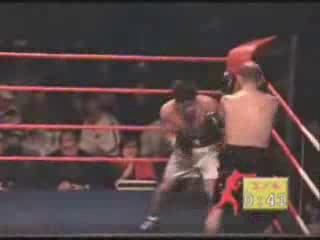

240 320


In [8]:
img = cv2.imread('/content/data1/frame5.jpg')
from google.colab.patches import cv2_imshow
cv2_imshow(img)
# get width and height
print(img.shape[0],img.shape[1])

In [9]:
# Step 1: Load and preprocess images from a folder
def load_images_from_folder(folder):
    images = []

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize the image to 224x224 pixels
            print(img.shape)
            images.append(img)
            # Assuming that images of one class are in one folder and the other class in another folder
    return images

In [10]:
# Define a simple perceptron class
class Perceptron:
    def __init__(self, input_size):
        # Initialize weights and bias to zero
        self.weights = np.zeros(input_size)
        self.bias = 0

    def predict(self, x):
        # Compute the dot product of input and weights, add bias, and apply a step function
        z = np.dot(x, self.weights) + self.bias
        return 1 if z > 0 else 0

    def train(self, X, y, learning_rate=0.05, epochs=100):
        for _ in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction

                # Update weights and bias
                self.weights += learning_rate * error * X[i]
                self.bias += learning_rate * error

In [11]:
# Sample data: You'll need to load your image data and preprocess it
# Here, X represents the flattened image features, and y represents the labels (0 or 1)
path1='/content/data1'
images= load_images_from_folder(path1)

# Step 2: Flatten the image data
X = np.array([img.flatten() for img in images])
y = np.array([0, 0, 0, 0, 0,1, 1, 1, 1, 1])  # Example labels

# Create and train the perceptron
perceptron = Perceptron(X.shape[1])
perceptron.train(X, y)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [12]:
print(X.shape[1])

150528


In [13]:
path3='/content/ANN_Fight_detection/no_fight/v_kiii_g02_c03.avi'
path4='/content/ANN_Fight_detection/fight/test_fight.avi'

In [14]:
cam = cv2.VideoCapture(path3)

try:

  # creating a folder named data
  if not os.path.exists('datatest'):
    os.makedirs('datatest')

# if not created then raise error
except OSError:
  print ('Error: Creating directory of data')

# frame
currentframe = 0

while(currentframe < 5):

  # reading from frame
  ret,frame = cam.read()

  if ret:
    # if video is still left continue creating images
    name = './datatest/frame' + str(currentframe) + '.jpg'
    print ('Creating...' + name)

    # writing the extracted images
    cv2.imwrite(name, frame)

    # increasing counter so that it will
    # show how many frames are created
    currentframe += 1
  else:
    break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../datatest/frame0.jpg
Creating..../datatest/frame1.jpg
Creating..../datatest/frame2.jpg
Creating..../datatest/frame3.jpg
Creating..../datatest/frame4.jpg


In [15]:
cam = cv2.VideoCapture(path4)

try:

  # creating a folder named data
  if not os.path.exists('datatest'):
    os.makedirs('datatest')

# if not created then raise error
except OSError:
  print ('Error: Creating directory of data')

# frame
currentframe = 0

while(currentframe < 5):

  # reading from frame
  ret,frame = cam.read()

  if ret:
    # if video is still left continue creating images
    name = './datatest/frame' + str(currentframe+5) + '.jpg'
    print ('Creating...' + name)

    # writing the extracted images
    cv2.imwrite(name, frame)

    # increasing counter so that it will
    # show how many frames are created
    currentframe += 1
  else:
    break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../datatest/frame5.jpg
Creating..../datatest/frame6.jpg
Creating..../datatest/frame7.jpg
Creating..../datatest/frame8.jpg
Creating..../datatest/frame9.jpg


In [16]:
# Make predictions on new data (replace this with your own image data)
path='/content/datatest'
image= load_images_from_folder(path)
new_data= np.array([img.flatten() for img in image])
out= np.array([0, 0, 0, 0, 0,1, 1, 1, 1, 1])
#new_data=X
predictions = [perceptron.predict(x) for x in new_data]

# Print the predictions
print("Predictions:", predictions)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
acc=0
for i in range(10):
  if(predictions[i]==out[i]):
    acc=acc+1
print(acc*10)

50
